In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['axes.unicode_minus'] = False

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as smapi


data = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/refs/heads/main/practice8_BHP2.csv")


# 범주형 변수에 대한 one-hot encoding
data = pd.get_dummies(data, dtype=int, drop_first=True)

# 데이터 표준화
sc= StandardScaler()
data= pd.DataFrame(sc.fit_transform(data), columns= data.columns)

y = data.price
X = data.drop('price', axis=1)

forOLS = 1

if forOLS :
    Xc = smapi.add_constant(X)   #for OLS
    X_train, X_test, y_train, y_test = train_test_split(Xc, y, random_state=11)
    lr = smapi.OLS(y_train, X_train)
    fitted = lr.fit()
    print('R-squared for test data : {:.3f}'.format(r2_score(y_test, fitted.predict(X_test))))
    print(fitted.summary())
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print('회귀계수:{} 절편:{:.3f} '.format(lr.coef_, lr.intercept_))
    print('R-squared:{:.3f}'.format(lr.score(X_test, y_test)))

R-squared for test data : 0.616
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     656.3
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        21:33:45   Log-Likelihood:                -6125.5
No. Observations:                5621   AIC:                         1.227e+04
Df Residuals:                    5612   BIC:                         1.233e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const   

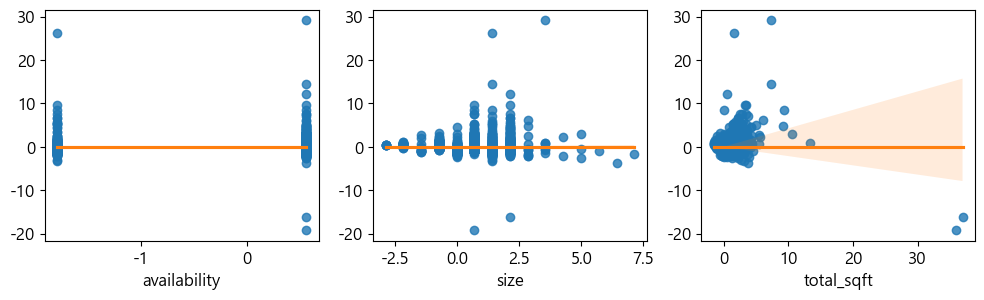

In [8]:
import seaborn as sns
from scipy.stats import zscore
sresid = zscore(fitted.resid)

fig, ax = plt.subplots(1, 3, figsize=(12,3))
for feature, ax in zip(X.columns, ax.ravel()):
    sns.regplot(x=X_train[feature], y=sresid, line_kws={'color':'C1'}, ax=ax)
plt.show()

* 회귀분석의 가정
    - 정규성 가정 확인
        - Jarque-Bera 통계량은 17235471.266이고 유의확률은 0.01보다 작다. 즉, 잔차의 정규성이 보장되지 않는다.
        - 왜도는 273.778로 오른쪽으로 크게 치우쳐있고, 첨도는 8.209로 매우 뾰족한 형태를 지니고 있다.
    - 등분산성 확인
        - 표준화 잔차 2가 넘는 극단값이 매우 많으며,
        - size와 total_sqft의 경우는 잔차가 자기상관을 갖는 것으로 보인다.
    - 독립성 분석
        - Durbin-Watson으로 분석하며, 귀무가설은 잔차 간 독립이고, 대립가설은 독립이 아닌 것으로 본다. 
        - 2.043으로 대체로 독립을 유지하는 것으로 확인된다.
* 회귀분석 결과 해석
    - 모형에 대한 설명
        - 이 회귀분석에서 설명변수는 availability, size, total_sqft, bath, balcony, 그리고 one-hot encoding으로 인해 생성된 area_type_carpet / area_type_Plot / area_type_Super이다. 그리고 반응변수는 집값에 해당하는 Price이다.
        - Price를 예측하기 위해 각 설명변수의 회귀계수 값을 추정한다.
    - 회귀식의 유의성 해석 (F검정. 다항회귀에 수행)
        - 회귀식의 유의성은 F검정으로 하며, 귀무가설은 모든 회계계수는 0이다 / 대립가설은 적어도 하나의 회귀계수는 0이 아니다.
        - 분석결과 F통계량은 656.3이고 유의확률은 0.01보다 작으므로 5%유의수준에서 회귀식은 유의하다.
    - 회귀계수의 유의성 해석 (t검정)
        - availability : 귀무가설은 회귀계수는 0, 대립가설은 회귀계수는 0이 아니다 / t통계량은 -0.451이고 유의확률 p-value가 0.652 / 즉 유의수준 0.05에서 귀무가설을 기각할 수 없다.
        - size : 귀무가설은 회귀계수는 0, 대립가설은 회귀계수는 0이 아니다 / t통계량은 0.185 유의확률 p-value는 0.853 / 즉, 유의수준 0.05에서 귀무가설을 기각할 수 없다.
        - total_sqft  : 귀무가설은 회귀계수는 0, 대립가설은 회귀계수는 0이 아니다 / t통계량은 33.933 유의확률 p-value는 0.001보다 작다 / 즉 유의수준 0.05에서 귀무가설을 기각한다.
        - bath : 귀무가설은 회귀계수는 0, 대립가설은 회귀계수는 0이 아니다 / t통계량은 17.582 유의확률 p-value는 0.001보다 작다 / 즉, 유의수준 005에서 귀무가설을 기각한다.
        - balcony : 귀무가설은 회귀계수는 0, 대립가설은 회귀계수는 0이 아니다 / t통계량은 유의확률 -0.453, p-value는 0.651이다 / 즉, 유의수준 0.05에서 귀무가설을 기각할 수 없다.
    - 회귀식의 설명력 해석
        - 회귀식의 설명력은 R-squred로 평가하며, 0.483으로, 데이터에 대해 약 48%의 설명력을 갖는다.
    - 회귀계수의 추정 및 회귀식 설명
        - 추정된 회귀식은 다음과 같다.
        - price = -0.0004 -0.0045*availability + 0.0031*size + 0.3898*total_sqft + 0.03898*bath - 0.0047*balcony
        - total_sqft와 baths는 확실한 양의 상관관계를 가지며, balcony와 avaiability의 경우 약한 음의 상관관계를 갖는다.
    
    


### 2. 앞선 모델에서 area_type과 total_sqft의 교호작용항을 추가하여 회귀분석을 수행하시오.


In [9]:
y = data.price
X = data.drop('price', axis=1)

for feat in X.columns:
    if 'area_type' in feat:
        X[f'{feat[10:]}:total_sqft'] = X[feat] * X.total_sqft

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
model2 = smapi.OLS(y_train, X_train)
fitted2 = model2.fit()

print('R-squared for test data : {:.3f}'.format(r2_score(y_test, fitted2.predict(X_test))))
fitted2.summary()

R-squared for test data : 0.697


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              555.4
Date:                Mon, 11 Aug 2025   Prob (F-statistic):                        0.00
Time:                        21:33:47   Log-Likelihood:                         -5911.1
No. Observations:                5621   AIC:                                  1.184e+04
Df Residuals:                    5610   BIC:                                  1.192e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
availability         -0.0087      0.010     -0.905      0.366      -0.028       0.010
size                  0.0139      0.016      0.861      0.390      -0.018       0.046
total_sqft            0.3871      0.013     29.865      0.000       0.362       0.413
bath                  0.2992      0.017     17.402      0.000       0.266       0.333
balcony              -0.0059      0.010     -0.586      0.558      -0.025       0.014
area_type_Carpet     -0.0047      0.011     -0.445      0.656      -0.026       0.016
area_type_Plot        0.0293      0.012      2.393      0.017       0.005       0.053
area_type_Super      -0.0006      0.010     -0.060      0.952      -0.021       0.020
Carpet:total_sqft     0.0072      0.012      0.587      0.557      -0.017       0.031
Plot:total_sqft       0.1186      0.006     21.005      0.000       0.108       0.130
Super:total_sqft      0.0839      0.008     10.101      0.000       0.068       0.100
==============================================================================
Omnibus:                     8905.137   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18413394.347
Skew:                           9.617   Prob(JB):                         0.00
Kurtosis:                     282.732   Cond. No.                         6.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. 앞선 모델에서 total_sqft의 이차항을 추가하여 회귀분석을 수행하시오.


In [17]:
y = data.price
X = data.drop('price', axis=1)

for feat in X.columns:
    if 'area_type' in feat:
        X[f'{feat[10:]}:total_sqft'] = X[feat] * X.total_sqft

X['total_sqft_sqrd'] = np.square(X.total_sqft)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
model3 = smapi.OLS(y_train, X_train)
fitted3 = model3.fit()

print('R-squared for test data : {:.3f}'.format(r2_score(y_test, fitted3.predict(X_test))))
fitted3.summary()

R-squared for test data : 0.732


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                              844.1
Date:                Mon, 11 Aug 2025   Prob (F-statistic):                        0.00
Time:                        23:01:19   Log-Likelihood:                         -5082.0
No. Observations:                5621   AIC:                                  1.019e+04
Df Residuals:                    5609   BIC:                                  1.027e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
availability         -0.0157      0.008     -1.891      0.059      -0.032       0.001
size                 -0.1349      0.014     -9.413      0.000      -0.163      -0.107
total_sqft            1.2117      0.022     55.398      0.000       1.169       1.255
bath                 -0.0202      0.017     -1.225      0.221      -0.053       0.012
balcony              -0.0239      0.009     -2.766      0.006      -0.041      -0.007
area_type_Carpet     -0.0042      0.009     -0.463      0.644      -0.022       0.014
area_type_Plot        0.0738      0.011      6.963      0.000       0.053       0.095
area_type_Super       0.0001      0.009      0.015      0.988      -0.017       0.018
Carpet:total_sqft    -0.0316      0.011     -2.973      0.003      -0.052      -0.011
Plot:total_sqft       0.0135      0.005      2.482      0.013       0.003       0.024
Super:total_sqft      0.0569      0.007      7.909      0.000       0.043       0.071
total_sqft_sqrd      -0.0302      0.001    -43.870      0.000      -0.032      -0.029
==============================================================================
Omnibus:                     9954.779   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25295238.983
Skew:                          12.249   Prob(JB):                         0.00
Kurtosis:                     330.724   Cond. No.                         78.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. 앞선 모델에서 변수선택을 하고 최종 모델분석을 수행하시오


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smapi

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [12,5]
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
y = data.price
X = data.drop('price', axis=1)

# 교호항 추가
for feat in X.columns:
    if 'area_type' in feat:
        X[f'{feat[10:]}:total_sqft'] = X[feat] * X.total_sqft

# total_sqrt의 제곱항 추가
X['total_sqft_sqrd'] = np.square(X.total_sqft)

# 통계적으로 유의하지 않은 속성 제거
feat_del = ['availability','area_type_Carpet','area_type_Super','bath']
X = X.drop(feat_del, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
model4 = smapi.OLS(y_test, X_test)
fitted4 = model4.fit()

print('R-squared score is {:.3f}'.format(r2_score(y_test, fitted4.predict(X_test))))
fitted4.summary()


In [23]:
fitted4.params.keys()

Index(['size', 'total_sqft', 'balcony', 'area_type_Plot', 'Carpet:total_sqft',
       'Plot:total_sqft', 'Super:total_sqft', 'total_sqft_sqrd'],
      dtype='object')

In [15]:
def stepwise_method(X, y, criterion='AIC'):
    result = pd.DataFrame()
    feat_comb = []
    for i in range(1, len(X.columns)+1):
        feat_comb += list(combinations(X.columns, i))
    feat_comb.reverse()

    for j, feat_comb in enumerate(feat_comb):
        X_ = X.filter(feat_comb)
        X_ = smapi.add_constant(X_)
        model = smapi.OLS(y, X_)
        fitted = model.fit()
        n = fitted.nobs     # number of observations
        p = fitted.df_model # 설명변수의 개수
        if j==0:             # 첫번째는 Full features
            MSE_full = fitted.mse_resid

        #각 기준값 입력
        result.loc[j, 'feat_comb'] = ', '.join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = fitted.aic
        result.loc[j, 'BIC'] = fitted.bic
        result.loc[j, 'CP'] = sum((fitted.resid)**2)/MSE_full - (n-2*(p+1))
        result.loc[j, 'adj_R2'] = fitted.rsquared_adj

        if criterion in ['AIC', 'BIC']: #낮을수록 best
            result = result.sort_values(by=criterion, ascending=True)
            best = result.iloc[0,0]
        elif criterion == 'adj_R2':     #높을수록 best
            result = result.sort_values(by=criterion, ascending=False)
            best = result.iloc[0,0]
        elif criterion == 'CP':
            best_idx = np.abs(result['CP']-result['feat_comb'].apply(lambda x: x.count(',')+1)).sort_values(ascending=True).index
            result = result.iloc[best_idx,0]
            best = result.iloc[0,0]
        else:
            print('criterion is wrong')
    return best, result    

In [26]:
y = data.price
X = data.drop('price', axis=1)

# 교호항 추가
for feat in X.columns:
    if 'area_type' in feat:
        X[f'{feat[10:]}:total_sqft'] = X[feat] * X.total_sqft

# total_sqrt의 제곱항 추가
X['total_sqft_sqrd'] = np.square(X.total_sqft)

# 통계적으로 유의하지 않은 속성 제거
feat_del = ['availability','area_type_Carpet','area_type_Super','bath']
X = X.drop(feat_del, axis=1)

best, result = stepwise_method(X, y, criterion='AIC')
print(X.columns)
print(result)

Index(['size', 'total_sqft', 'balcony', 'area_type_Plot', 'Carpet:total_sqft',
       'Plot:total_sqft', 'Super:total_sqft', 'total_sqft_sqrd'],
      dtype='object')
                                             feat_comb  ...    adj_R2
0    const, size, total_sqft, balcony, area_type_Pl...  ...  0.668587
5    const, size, total_sqft, balcony, area_type_Pl...  ...  0.668211
3    const, size, total_sqft, area_type_Plot, Carpe...  ...  0.667999
23   const, size, total_sqft, area_type_Plot, Plot:...  ...  0.667620
7    const, size, total_sqft, balcony, area_type_Pl...  ...  0.665626
..                                                 ...  ...       ...
232                  const, balcony, Carpet:total_sqft  ...  0.030037
252                                     const, balcony  ...  0.028867
222          const, Carpet:total_sqft, total_sqft_sqrd  ...  0.017909
247                             const, total_sqft_sqrd  ...  0.017374
250                           const, Carpet:total_sqft  ...  0.